In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
## displaying the counts of each taget value
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# Separate features and target variable
target_column = 'Class'
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]               # Target variable

## visualize the target variable

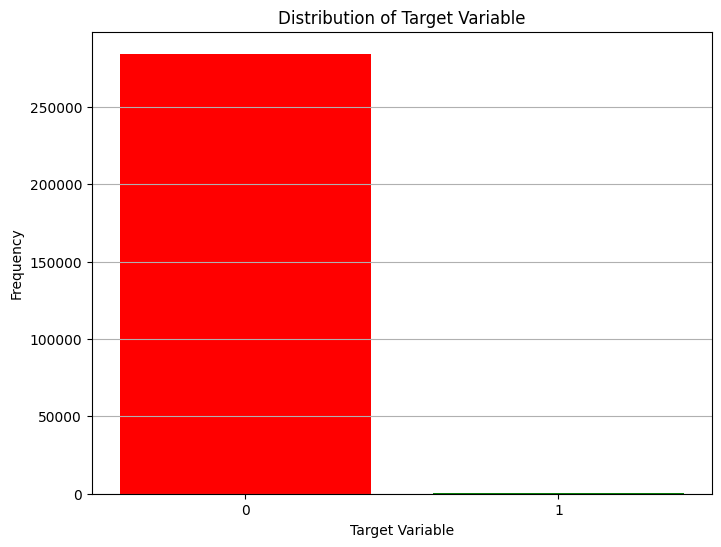

In [6]:
# visualize the target variable
# Define colors for each class
colors = ['red', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

## Apply SMOTE to balance the dataset class variables

In [7]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

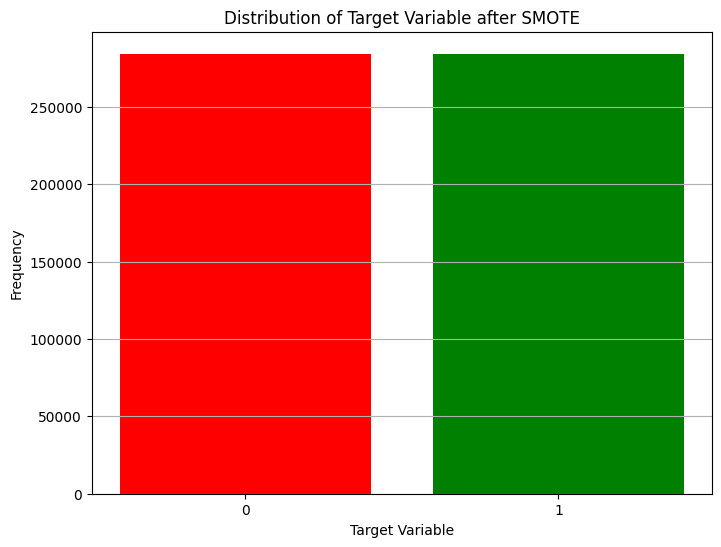

In [8]:
# Define colors for each class
colors = ['red', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

## Split the dataset into training, validation, and test sets

In [9]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.fillna(X_train.mean(), inplace=True)  # Replace NaN with column means

In [12]:
# Define the feature columns (excluding the target column 'Class')
feature_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                   'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                   'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Ensure X_train is a DataFrame with the correct number of columns
X_train = pd.DataFrame(X_train, columns=feature_columns)

# Calculate mutual information scores between the features and the target
mi = mutual_info_classif(X_train, y_train)

# Convert mutual information scores to a Pandas Series
mi = pd.Series(mi)

# Label the Series with feature names
mi.index = X_train.columns

# Sort the Series by mutual information scores
mi_sorted = mi.sort_values(ascending=False)

# Display the sorted Series
print(mi_sorted)

V14       0.542078
V10       0.479192
V12       0.473344
V17       0.445749
V4        0.442295
V11       0.430011
V3        0.401991
Amount    0.391597
V16       0.357589
V7        0.325409
V2        0.304165
V9        0.287757
Time      0.262964
V27       0.250851
V21       0.241967
V1        0.230945
V18       0.218086
V6        0.194537
V28       0.188016
V8        0.171475
V5        0.164409
V20       0.121794
V19       0.110898
V24       0.071539
V23       0.069889
V26       0.059852
V25       0.038524
V22       0.035538
V15       0.024494
V13       0.023756
dtype: float64


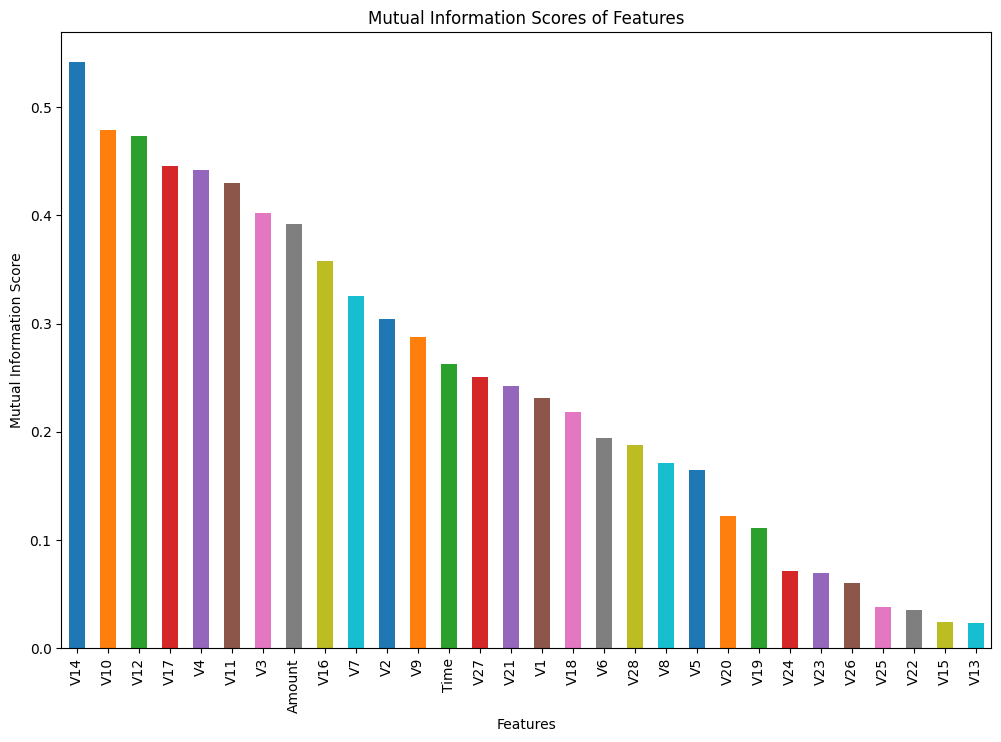

In [13]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()

## Random Forest Classifier Model

In [14]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 1.0000
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42685
           1       1.00      1.00      1.00     42609

    accuracy                           1.00     85294
   macro avg       1.00      1.00      1.00     85294
weighted avg       1.00      1.00      1.00     85294

Test Accuracy: 0.9999
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42464
           1       1.00      1.00      1.00     42831

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



### Receiver Operating Characteristic (ROC) Curve of RF model

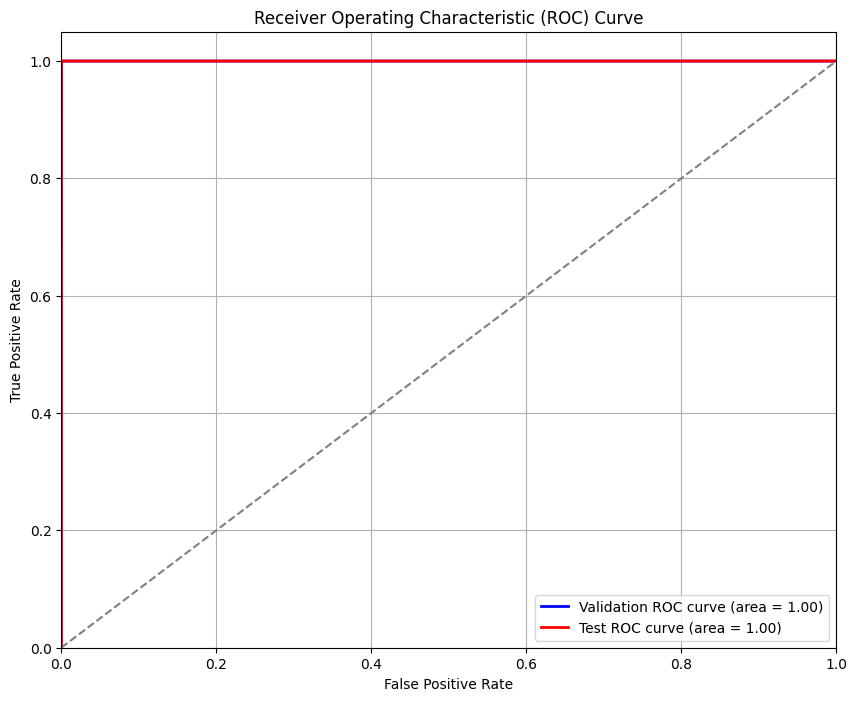

In [15]:
# Predict probabilities on the validation set
y_val_pred_prob = rf_clf.predict_proba(X_val)[:, 1]  # Get the probability of the positive class
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Decision Tree classifier Model

In [16]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9983
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42685
           1       1.00      1.00      1.00     42609

    accuracy                           1.00     85294
   macro avg       1.00      1.00      1.00     85294
weighted avg       1.00      1.00      1.00     85294

Test Accuracy: 0.9979
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42464
           1       1.00      1.00      1.00     42831

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



## ROC Curve of Decision Tree classifier

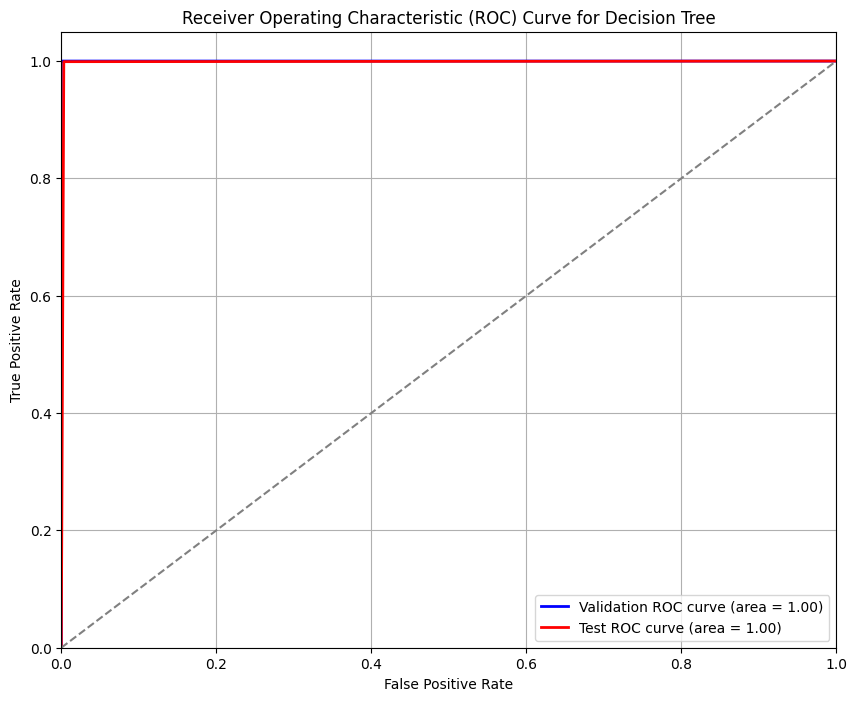

In [17]:
# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Predict probabilities on the test set
y_test_pred_prob = dt.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Logistic Regression classifier

In [18]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9791
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42685
           1       0.99      0.97      0.98     42609

    accuracy                           0.98     85294
   macro avg       0.98      0.98      0.98     85294
weighted avg       0.98      0.98      0.98     85294

Test Accuracy: 0.9802
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42464
           1       0.99      0.97      0.98     42831

    accuracy                           0.98     85295
   macro avg       0.98      0.98      0.98     85295
weighted avg       0.98      0.98      0.98     85295



## ROC Curve of Logistics Regression Model

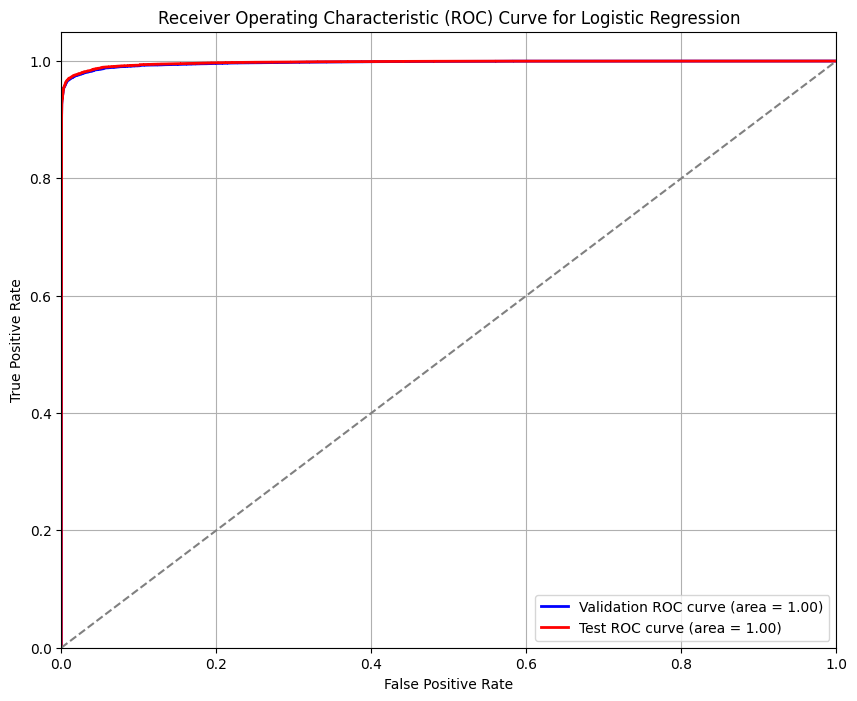

In [19]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Gradient Boosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gbm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = gbm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9866
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     42685
           1       0.99      0.98      0.99     42609

    accuracy                           0.99     85294
   macro avg       0.99      0.99      0.99     85294
weighted avg       0.99      0.99      0.99     85294

Test Accuracy: 0.9874
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     42464
           1       0.99      0.98      0.99     42831

    accuracy                           0.99     85295
   macro avg       0.99      0.99      0.99     85295
weighted avg       0.99      0.99      0.99     85295



## ROC curve of Gradient Boosting Model

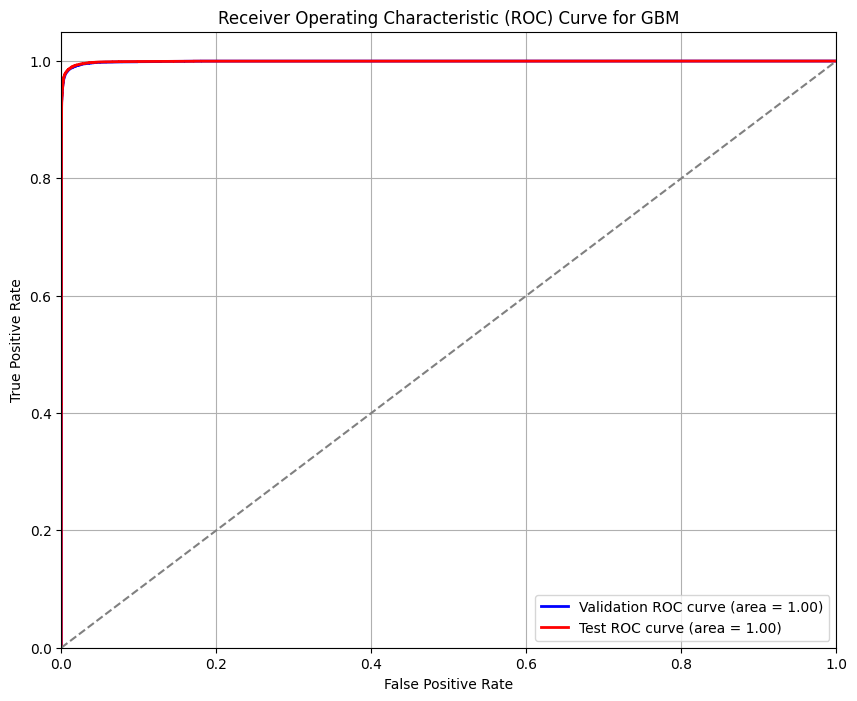

In [21]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = gbm.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = gbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Multi-Layer Perceptron (MLP) Classifier

In [22]:
from sklearn.neural_network import MLPClassifier

# Train MLP classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)  # Increased max_iter for convergence
mlp.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = mlp.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9775
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     42685
           1       0.98      0.97      0.98     42609

    accuracy                           0.98     85294
   macro avg       0.98      0.98      0.98     85294
weighted avg       0.98      0.98      0.98     85294

Test Accuracy: 0.9788
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     42464
           1       0.98      0.98      0.98     42831

    accuracy                           0.98     85295
   macro avg       0.98      0.98      0.98     85295
weighted avg       0.98      0.98      0.98     85295



## ROC Curve of MLP Model

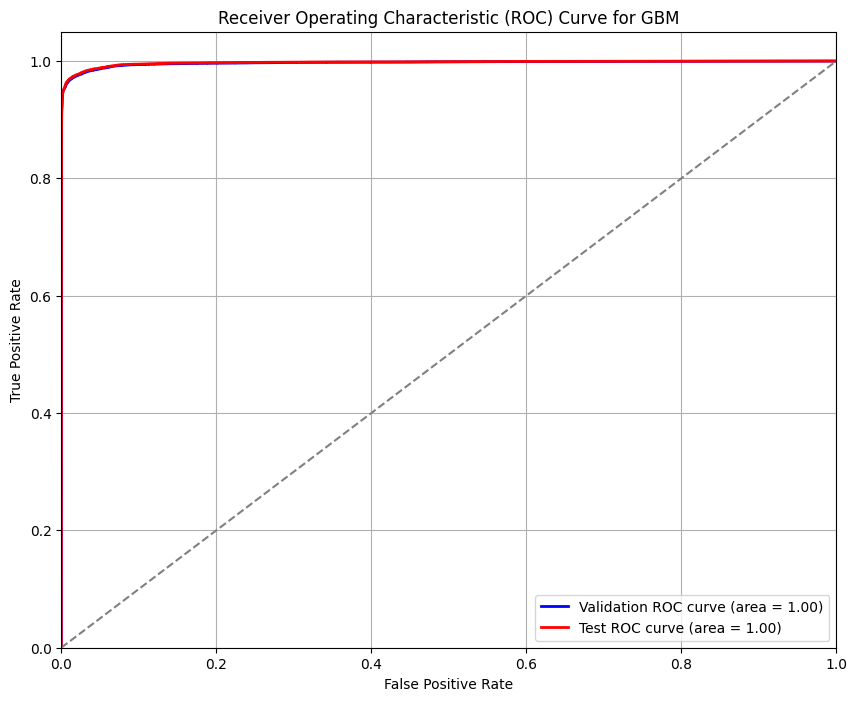

In [23]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = mlp.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Deep Learning Models

### Convolutional Neural Network (CNN)

### Recurrent Neural Network (RNN)

### Long Short-Term Memory (LSTM)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Ensure the input data has the right shape (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=-1)  # Adding the feature dimension
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

In [25]:
# CNN Model
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RNN Model
def build_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# Train and evaluate each model
models = {
    'CNN': build_cnn((X_train.shape[1], X_train.shape[2])),
    'RNN': build_rnn((X_train.shape[1], X_train.shape[2])),
    'LSTM': build_lstm((X_train.shape[1], X_train.shape[2]))
}

In [27]:
# Training loop
for model_name, model in models.items():
    print(f'\nTraining {model_name} model...')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    
    # Predict on the test set
    y_test_pred = (model.predict(X_test) > 0.5).astype(int).ravel()  # Threshold for binary classification
    
    # Evaluate the model
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Test Classification Report:')
    print(test_report)


Training CNN model...
Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9623 - loss: 1.9102 - val_accuracy: 0.9953 - val_loss: 0.0208
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9970 - loss: 0.0132 - val_accuracy: 0.9986 - val_loss: 0.0084
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9988 - loss: 0.0136 - val_accuracy: 0.9987 - val_loss: 0.0059
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9991 - val_loss: 0.0073
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9991 - val_loss: 0.0037
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 49


Training CNN model...
Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9593 - loss: 4.1041 - val_accuracy: 0.9944 - val_loss: 0.0480
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9957 - loss: 0.0177 - val_accuracy: 0.9981 - val_loss: 0.0086
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - accuracy: 0.9981 - loss: 0.0077 - val_accuracy: 0.9988 - val_loss: 0.0066
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - accuracy: 0.9988 - loss: 0.0058 - val_accuracy: 0.9986 - val_loss: 0.0105
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 23437s 2s/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 

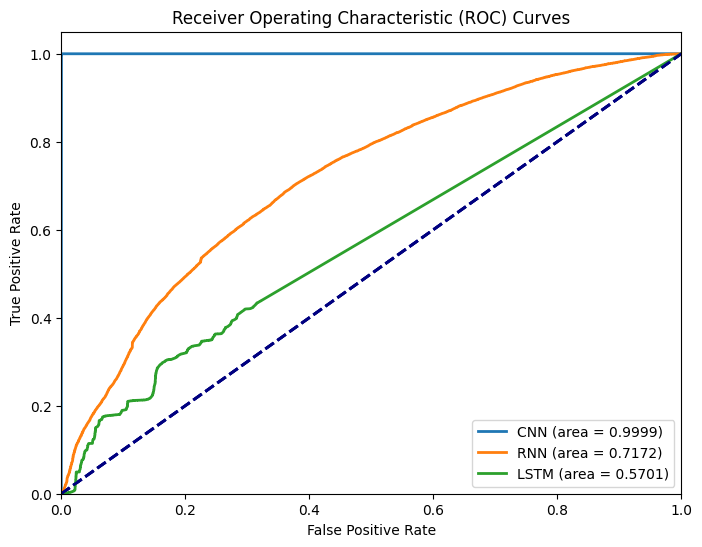

2666/2666 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
CNN Test Accuracy: 0.9996
CNN Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42464
           1       1.00      1.00      1.00     42831

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295

2666/2666 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
RNN Test Accuracy: 0.6483
RNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59     42464
           1       0.62      0.79      0.69     42831

    accuracy                           0.65     85295
   macro avg       0.66      0.65      0.64     85295
weighted avg       0.66      0.65      0.64     85295

2666/2666 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step
LSTM Test Accuracy: 0.4931
LSTM Test Classification Report:
              precision    recall  f1-sc

In [28]:
# Function to plot ROC curve
def plot_roc(y_test, y_test_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Initialize models
models = {
    'CNN': build_cnn((X_train.shape[1], X_train.shape[2])),
    'RNN': build_rnn((X_train.shape[1], X_train.shape[2])),
    'LSTM': build_lstm((X_train.shape[1], X_train.shape[2]))
}

# Training loop and ROC plotting
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    print(f'\nTraining {model_name} model...')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    
    # Predict probabilities on the test set for ROC curve
    y_test_proba = model.predict(X_test).ravel()  # Flatten the output
    
    # Plot ROC curve for the model
    plot_roc(y_test, y_test_proba, model_name)

# Finalize and show the ROC plot
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Optionally: Evaluate accuracy and print classification reports
for model_name, model in models.items():
    y_test_pred = (model.predict(X_test) > 0.5).astype(int).ravel()  # Threshold for binary classification
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Test Classification Report:')
    print(test_report)